<a href="https://colab.research.google.com/github/gayatri-2005/Machine-Learning-/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [22]:
df.drop(['month','year','day'],axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [23]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [24]:
df['Classes'] = df['Classes'].astype(str).str.strip()
print(df['Classes'].unique()) # Debugging step: print unique values after stripping
df['Classes'] = np.where(df['Classes'] == 'not fire', 0, 1)
df.head()

['not fire' 'fire']


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [25]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [26]:
X= df.drop('FWI',axis=1)
y=df['FWI']

In [27]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [28]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [30]:
#Feature Selection based on correlation
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,-0.030327,NaN,0.082147,-0.072161,0.043611,-0.073855,0.253695,0.496505,0.540581,0.190732,0.529327,0.244289,0.019528
month,-0.030327,1.000000,NaN,-0.015272,-0.031036,-0.037508,0.008632,-0.006620,0.053308,0.121493,0.076010,0.074529,0.005476,-0.014930
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.082147,-0.015272,NaN,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.072161,-0.031036,NaN,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,0.043611,-0.037508,NaN,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.073855,0.008632,NaN,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.253695,-0.006620,NaN,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.496505,0.053308,NaN,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.540581,0.121493,NaN,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838


<Axes: >

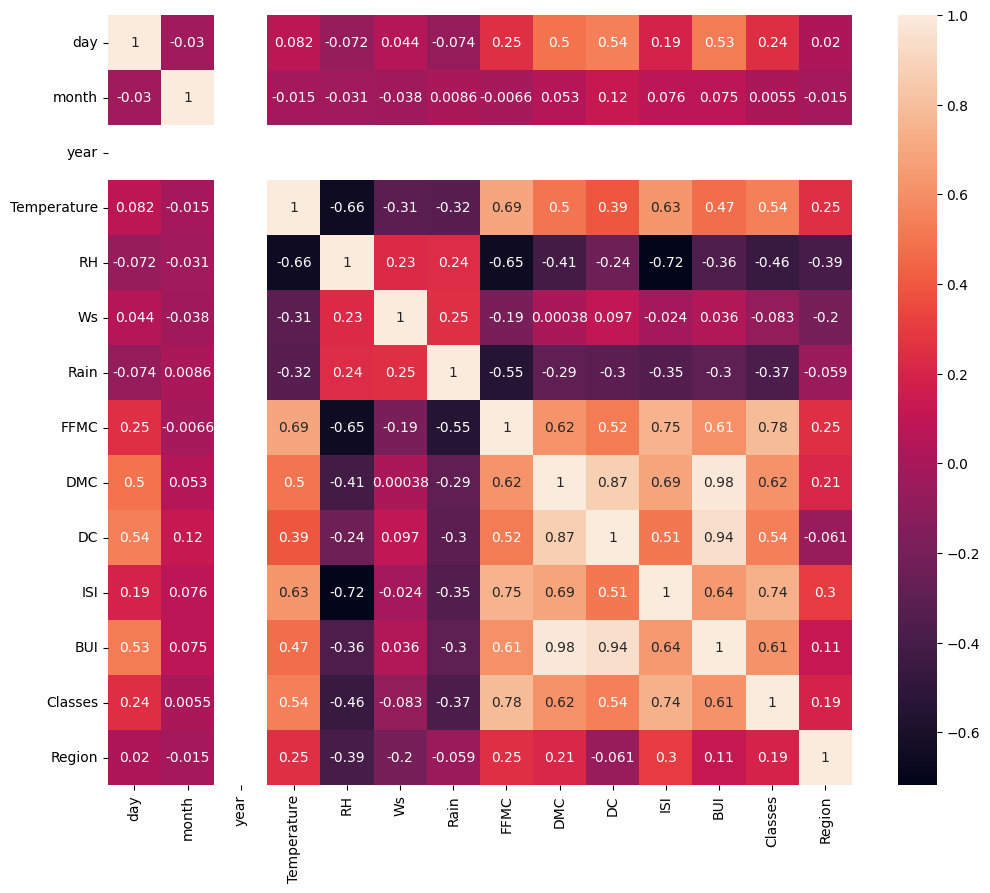

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [32]:
correlation(X_train,0.85)

['BUI', 'DC']

In [37]:
##Feature scaling or standardisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

R2 Score: 0.9837888473078155
MAE: 0.5796315075744052
MSE: 0.7175144186205957


Text(0, 0.5, 'Predicted')

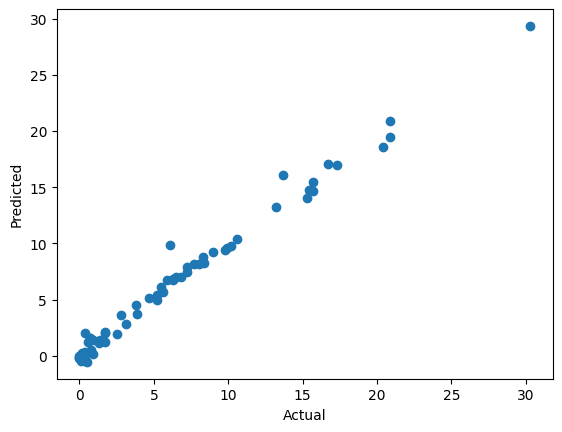

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred) #If it is linear then this is good model
plt.xlabel('Actual')
plt.ylabel('Predicted')

LASSO REGRESSION



R2 Score: 0.9492020277152009
MAE: 1.1331759902742837
MSE: 2.2483458297573553


Text(0, 0.5, 'Predicted')

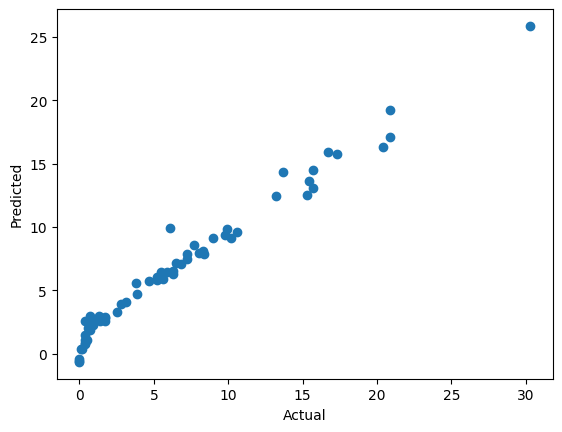

In [42]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Lasso = Lasso()
Lasso.fit(X_train_scaled,y_train)
y_pred = Lasso.predict(X_test_scaled)
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred) #If it is linear then this is good model
plt.xlabel('Actual')
plt.ylabel('Predicted')

Ridge Regression



R2 Score: 0.9831604230861806
MAE: 0.5991395275398727
MSE: 0.745328815819562


Text(0, 0.5, 'Predicted')

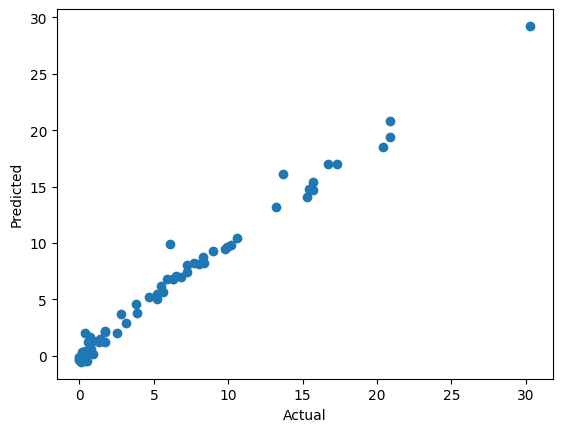

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Ridge = Ridge()
Ridge.fit(X_train_scaled,y_train)
y_pred = Ridge.predict(X_test_scaled)
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred) #If it is linear then this is good model
plt.xlabel('Actual')
plt.ylabel('Predicted')

R2 Score: 0.8760305780807829
MAE: 1.85587828572771
MSE: 5.486953912782623


Text(0, 0.5, 'Predicted')

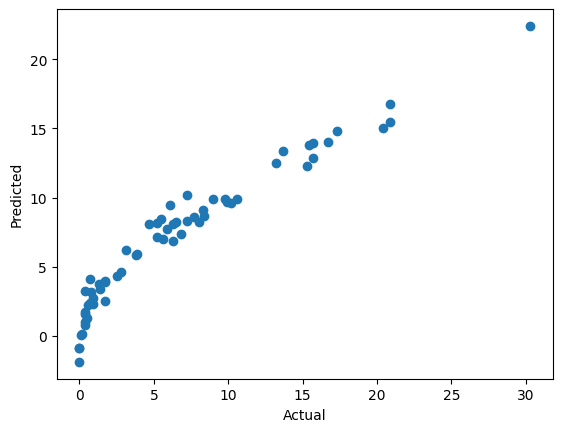

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
ElasticNet = ElasticNet()
ElasticNet.fit(X_train_scaled,y_train)
y_pred = ElasticNet.predict(X_test_scaled)
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred) #If it is linear then this is good model
plt.xlabel('Actual')
plt.ylabel('Predicted')

R2 Score: 0.8760305780807829
MAE: 1.85587828572771
MSE: 5.486953912782623


Text(0, 0.5, 'Predicted')

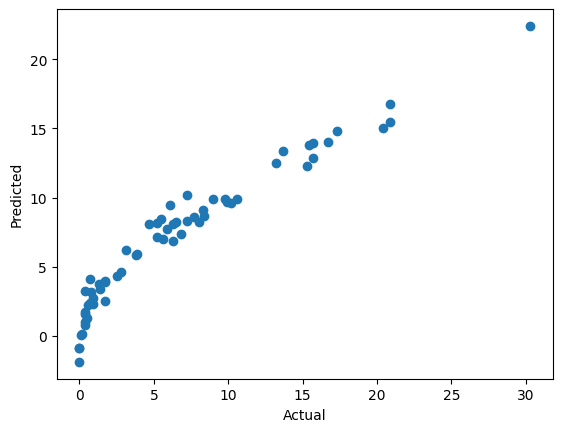

In [48]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = ElasticNet.predict(X_test_scaled)
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred) #If it is linear then this is good model
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [46]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [47]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

R2 Score: 0.9831604230861806
MAE: 0.5991395275398727
MSE: 0.745328815819562


Text(0, 0.5, 'Predicted')

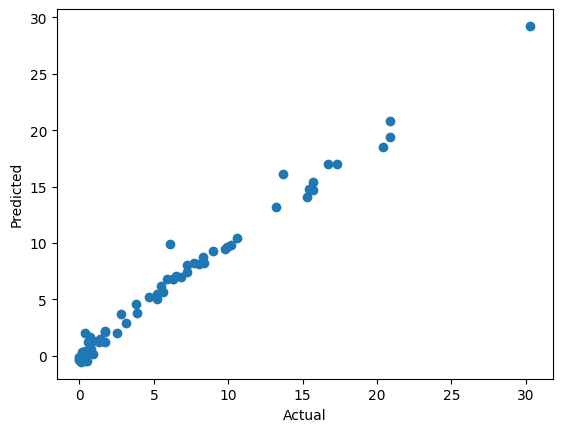

In [49]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred =ridgecv.predict(X_test_scaled)
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred) #If it is linear then this is good model
plt.xlabel('Actual')
plt.ylabel('Predicted')

R2 Score: 0.9804623429135192
MAE: 0.6728137405771029
MSE: 0.8647473089543644


Text(0, 0.5, 'Predicted')

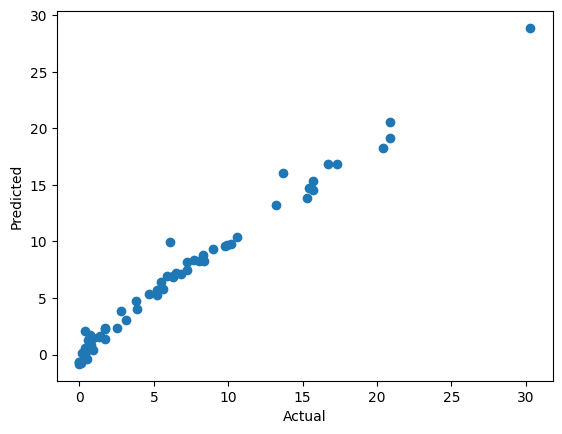

In [50]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
ElasticNet = ElasticNetCV()
ElasticNet.fit(X_train_scaled,y_train)
y_pred = ElasticNet.predict(X_test_scaled)
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred) #If it is linear then this is good model
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Task
Define a `correlation` function to identify highly correlated features in `X_train` with a threshold of 0.85, then drop these features from both `X_train` and `X_test`, and finally summarize the dropped features and the updated dimensions of the datasets.

## Define Correlation Function

### Subtask:
Define a Python function named `correlation` that takes a DataFrame and a correlation threshold as input. This function will identify columns with a correlation coefficient greater than or equal to the specified threshold and return a list of column names to be dropped.


**Reasoning**:
To address the subtask, I need to define the `correlation` function as specified, which calculates the correlation matrix, identifies highly correlated columns based on a given threshold, and returns a list of columns to be dropped. This will directly fulfill the current instruction.



In [33]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

print("The 'correlation' function has been defined.")

The 'correlation' function has been defined.


**Reasoning**:
Now that the `correlation` function is defined, I will use it to identify highly correlated features in `X_train` based on the given threshold of 0.85.



In [34]:
## Check for highly correlated features
correlated_features = correlation(X_train, 0.85)
print(f"Highly correlated features to drop: {correlated_features}")

Highly correlated features to drop: ['BUI', 'DC']


**Reasoning**:
With the highly correlated features identified, I will now drop these features from both the training and testing datasets (`X_train` and `X_test`) to reduce multicollinearity. Afterward, I will display the new dimensions of both datasets to confirm the changes.



In [35]:
X_train.drop(correlated_features, axis=1, inplace=True)
X_test.drop(correlated_features, axis=1, inplace=True)

print(f"Updated X_train shape: {X_train.shape}")
print(f"Updated X_test shape: {X_test.shape}")

Updated X_train shape: (182, 12)
Updated X_test shape: (61, 12)


## Final Task

### Subtask:
Summarize the features that were dropped due to high correlation and confirm the updated dimensions of the training and testing datasets.


## Summary:

### Q&A
The features dropped due to high correlation (threshold of 0.85) were 'BUI' and 'DC'. The updated dimensions of the training dataset (`X_train`) are (182, 12) and the testing dataset (`X_test`) are (61, 12).

### Data Analysis Key Findings
*   A Python function named `correlation` was successfully defined to identify highly correlated features.
*   Two features, 'BUI' and 'DC', were identified as highly correlated in `X_train` with a correlation threshold of 0.85.
*   These highly correlated features ('BUI', 'DC') were dropped from both the training and testing datasets.
*   The `X_train` dataset was reduced from its original size to `(182, 12)`.
*   The `X_test` dataset was reduced from its original size to `(61, 12)`.

### Insights or Next Steps
*   Dropping highly correlated features helps prevent multicollinearity, which can improve model interpretability and stability, especially for linear models.
*   The next step should involve training the machine learning model with the updated datasets, as feature selection has been performed to reduce redundancy.
